# ○ 빅데이터 분석기초_시각화

## 패키지 불러오기 

In [2]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 그래프 표시
%matplotlib inline

In [3]:
# 한글과 음수 표시
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [4]:
df_fitness = pd.read_csv("D:/data/bigdata_기초01/FITNESS.CSV", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [5]:
# 데이터를 인포트 한다 (환율.CSV 데이터), parse_dates: 날짜 변수 지정
df_currency = pd.read_csv("D:/data/bigdata_기초01/환율.CSV", parse_dates = ["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


## Bar Chart 그리기

<Axes: xlabel='GENDER', ylabel='count'>

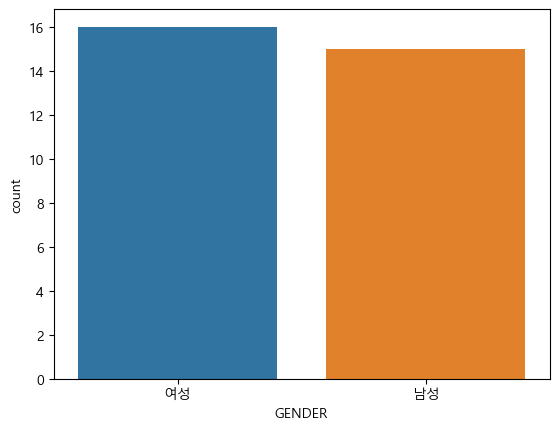

In [6]:
# 성별 Bar Chart
sns.countplot(x='GENDER',  data=df_fitness)

<Axes: xlabel='AGEGROUP', ylabel='count'>

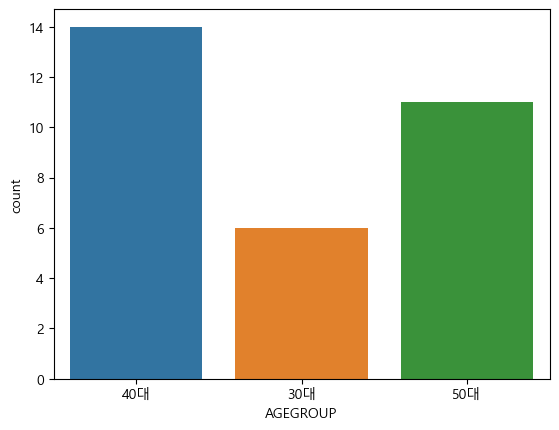

In [7]:
# 연령대 Bar Chart
sns.countplot(x="AGEGROUP", data=df_fitness)

<Axes: xlabel='AGEGROUP', ylabel='count'>

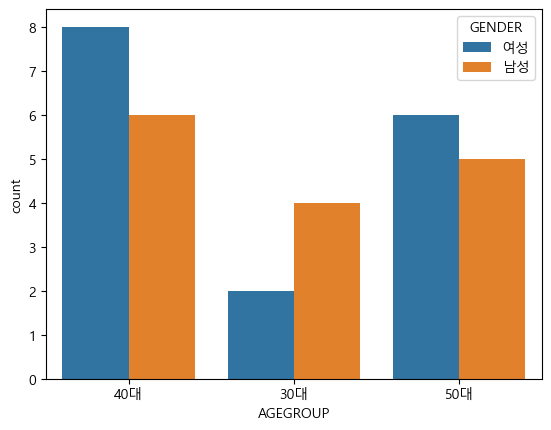

In [8]:
# 성별+연령대 Bar Chart
sns.countplot(x="AGEGROUP", hue="GENDER", data=df_fitness)

## Histogram 그리기

<Axes: xlabel='OXY', ylabel='Count'>

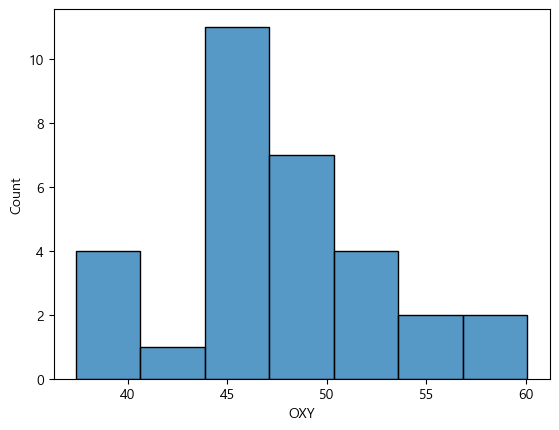

In [9]:
# df.hist method 이용 : OXY에 대한 히스토그램 생성 
sns.histplot(data=df_fitness, x="OXY")

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

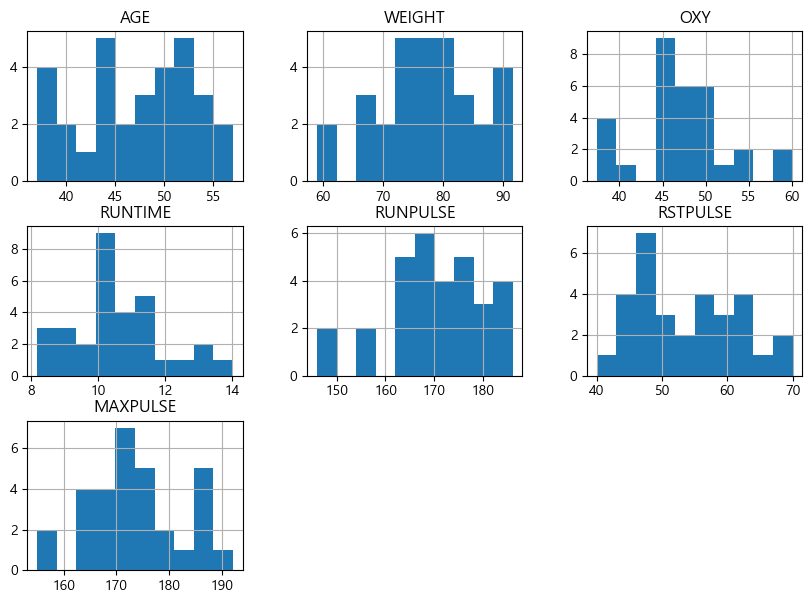

In [11]:
# hist(figsiz) : figsize = (x축 크기, y축 크기)-그래프 영역별 중첩 처리
df_fitness.hist(figsize = (10,7))

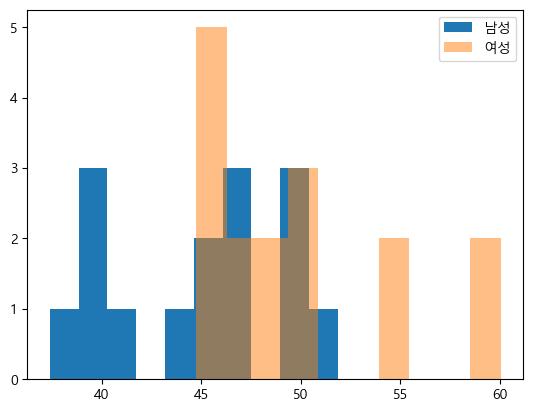

In [10]:
# hist(변수,label="표시 값" , alpha = 투명도(0~1 지정) )
plt.hist(df_fitness[df_fitness["GENDER"] == "남성"]["OXY"],label = "남성", alpha = 1.0)
plt.hist(df_fitness[df_fitness["GENDER"] == "여성"]["OXY"],label = "여성", alpha = 0.5)
plt.legend()

<Axes: xlabel='OXY', ylabel='Count'>

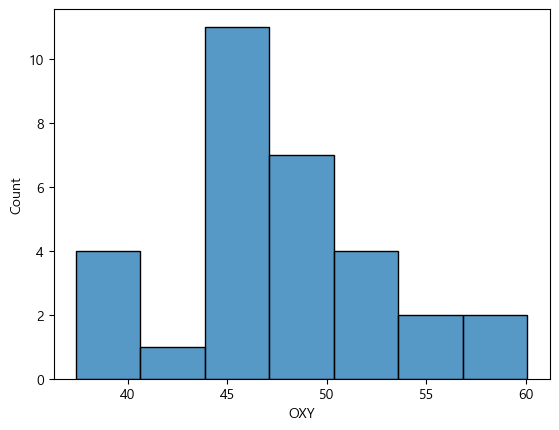

In [15]:
# seabon을 이용 histogram 그리기 
sns.histplot(data=df_fitness, x="OXY")

<Axes: xlabel='OXY', ylabel='Count'>

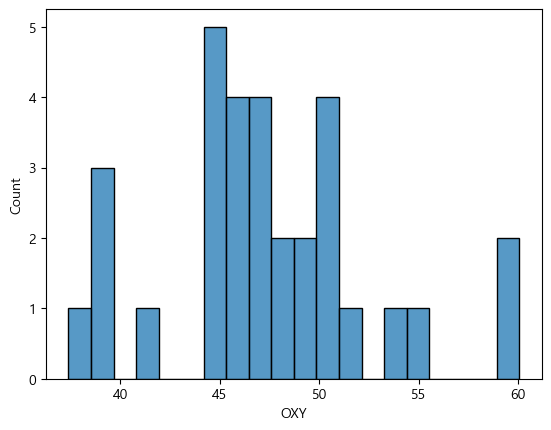

In [17]:
# x축 구간(bin) 조정(상세 분포 확인)
sns.histplot(data=df_fitness, x="OXY", bins=20)

##  boxplot 그리기

<Axes: xlabel='AGEGROUP', ylabel='OXY'>

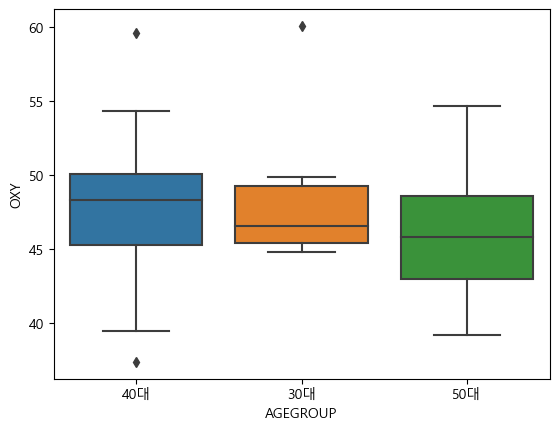

In [18]:
# 연령대 혈당 산소 요구량 분포
sns.boxplot(y='OXY', x='AGEGROUP', data=df_fitness)

<Axes: xlabel='GENDER', ylabel='OXY'>

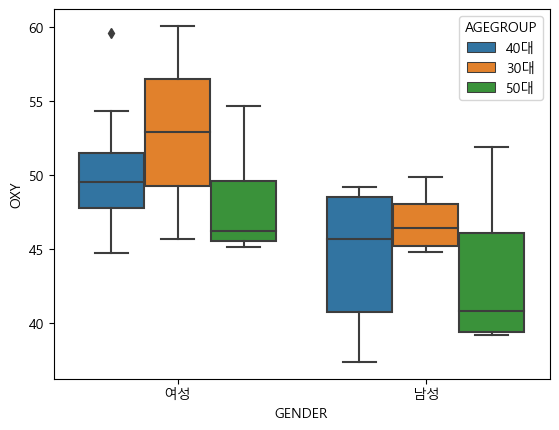

In [23]:
# 성별+연령대 혈당 산소 요구량 분포
sns.boxplot(y='OXY', x= 'GENDER',hue='AGEGROUP', data=df_fitness)

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

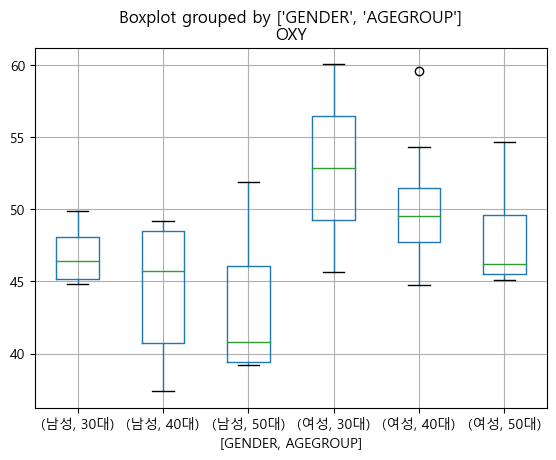

In [17]:
# boxplot(column= 변수, by=  그룹 변수) 
df_fitness.boxplot(column="OXY", by = ["GENDER", "AGEGROUP"])

## Pie Chart 그리기

<AxesSubplot:ylabel='None'>

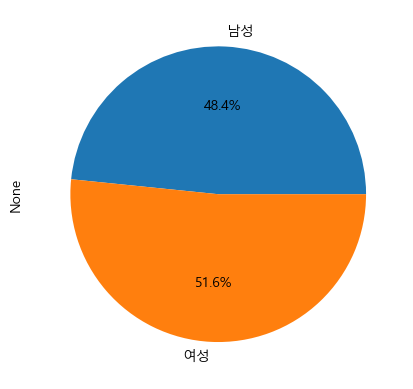

In [18]:
#성별 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_fitness.groupby(["GENDER"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

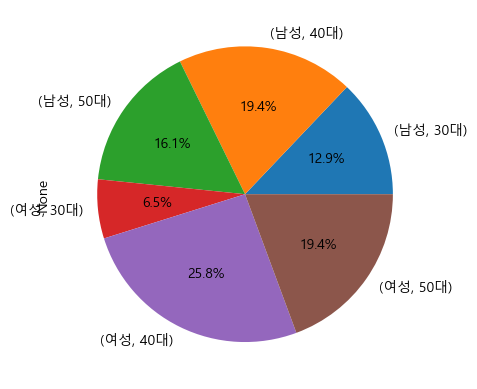

In [19]:
#성별+연령대 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

## scatterplot 그리기

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

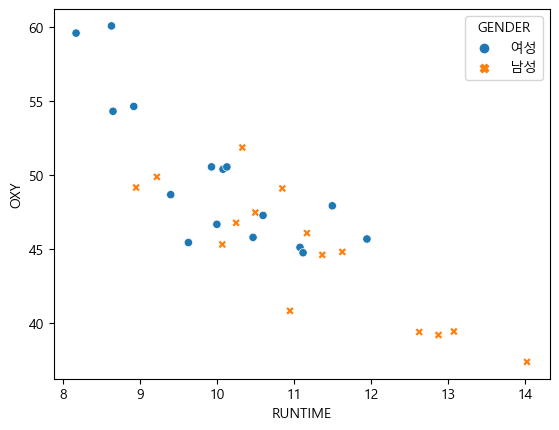

In [20]:
# scatterplot( x, y, hue: 그룹 변수, style : 그룹별 marker 구분 ,  data )
sns.scatterplot(x = "RUNTIME", y = "OXY", hue = "GENDER", style= "GENDER", data = df_fitness  )

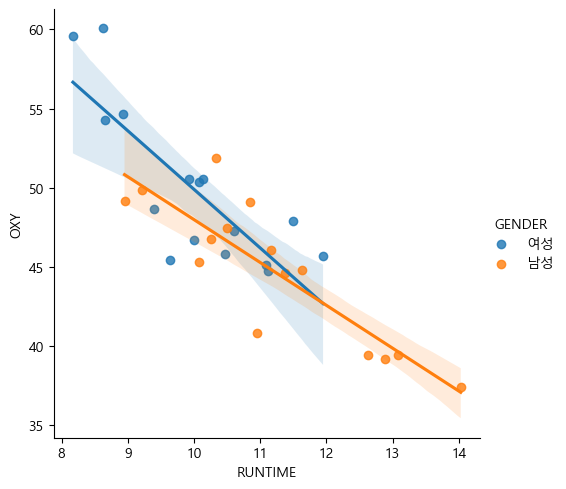

In [27]:
# 회귀선 + 플롯 그리기 (seaborn lmplot)
sns.lmplot(data=df_fitness, x = "RUNTIME", y = "OXY", hue="GENDER")

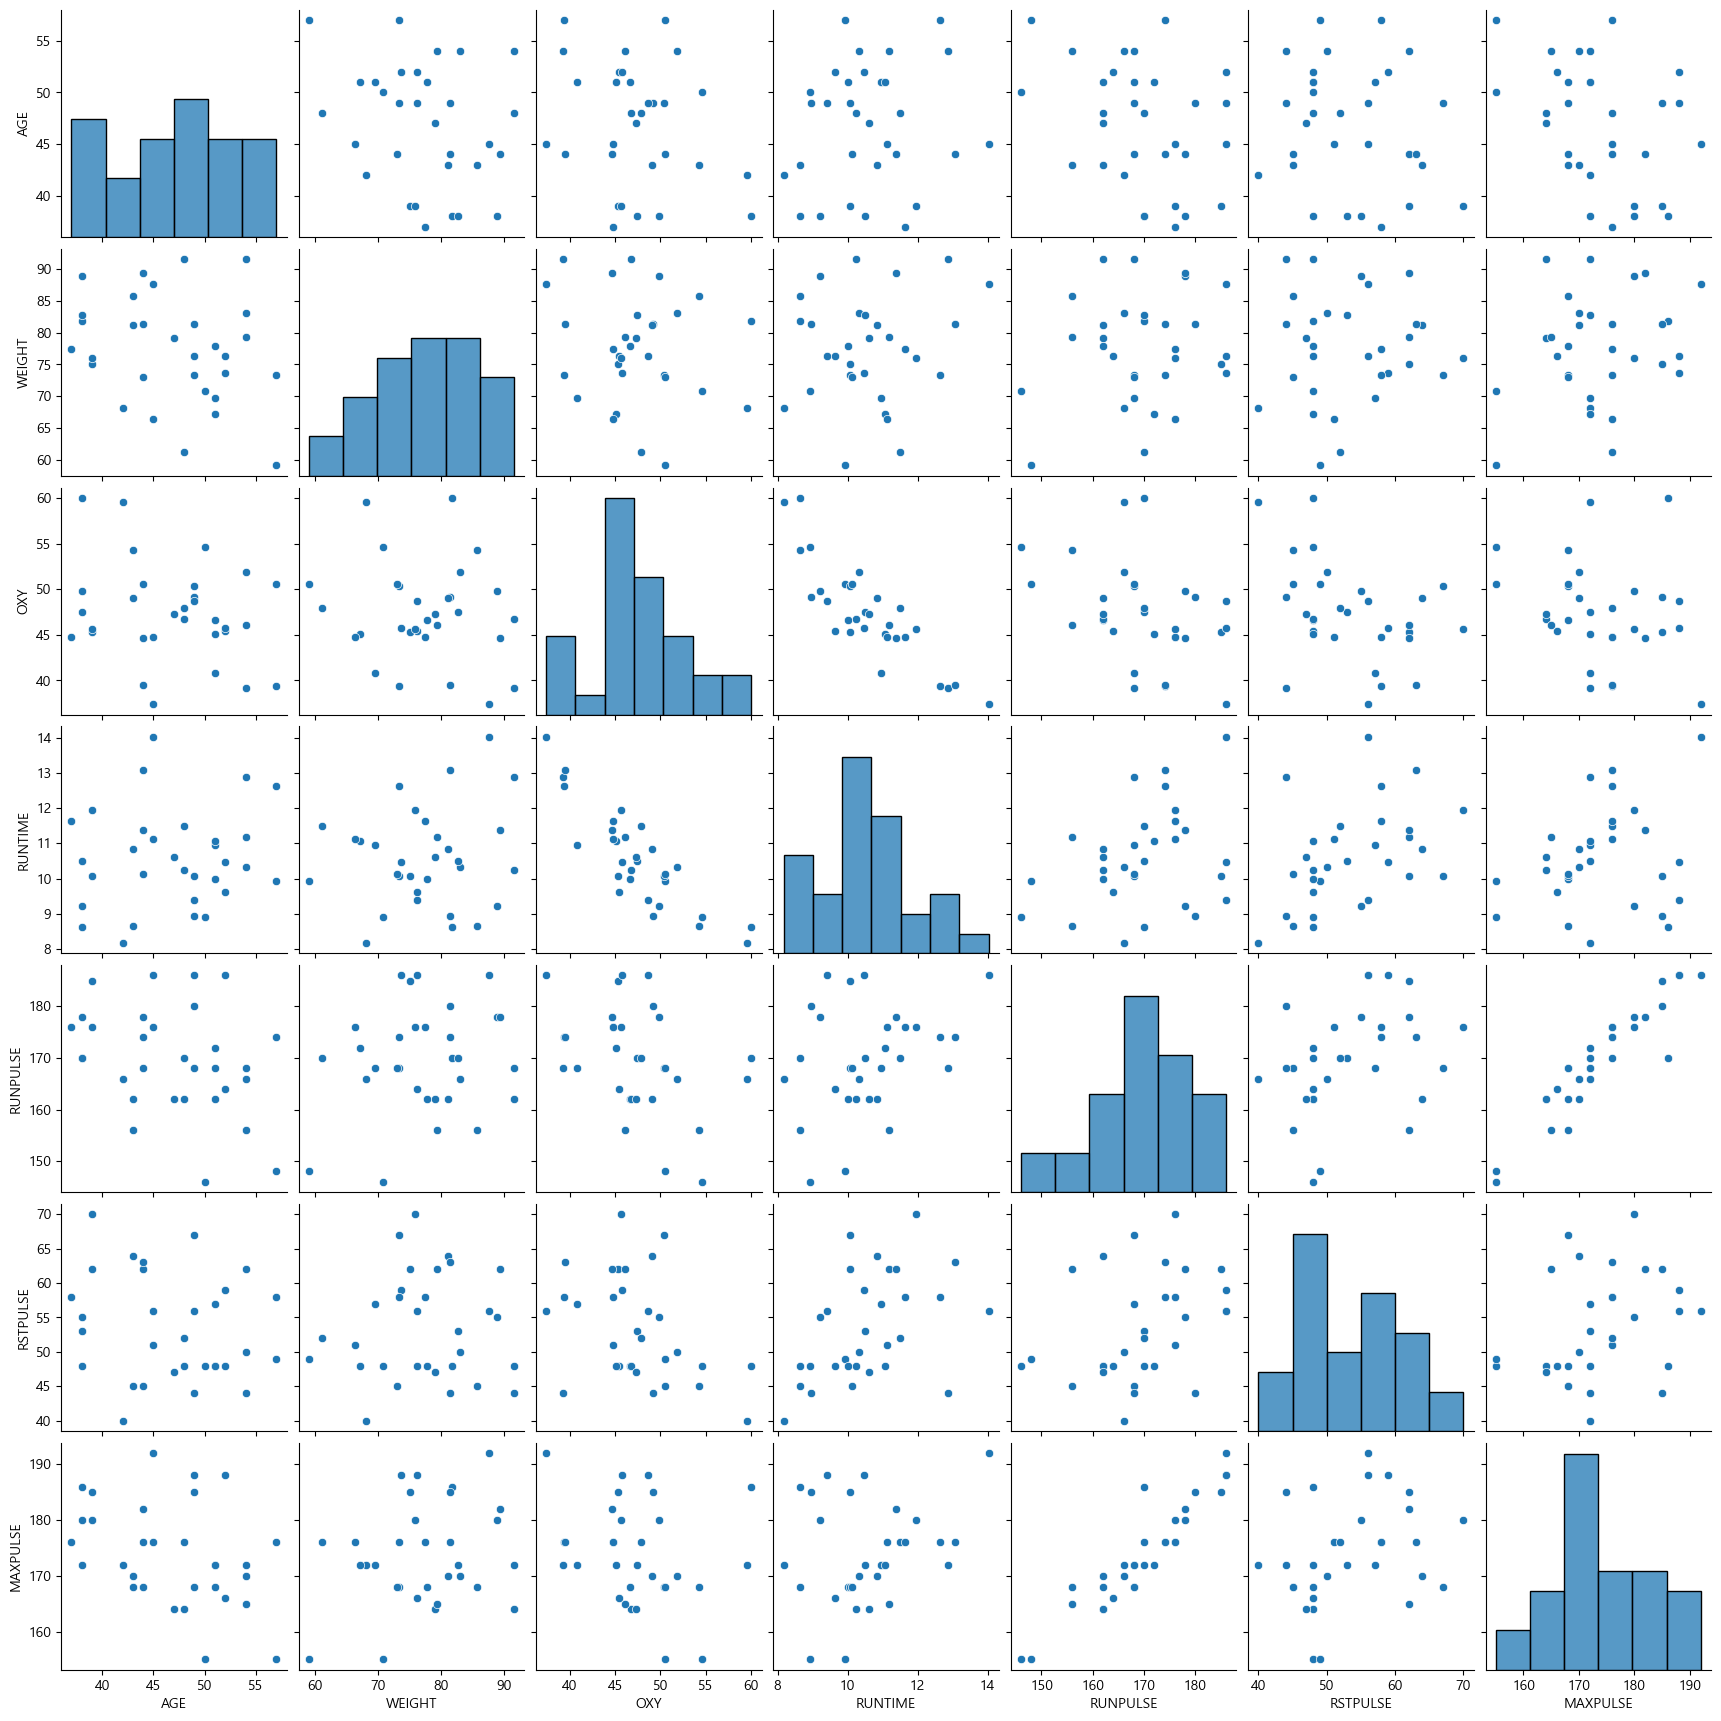

In [21]:
# pairplot(데이터): Scatter Plot  그래프 생성
sns.pairplot(df_fitness)

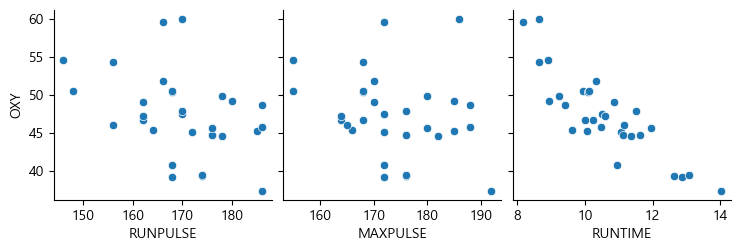

In [22]:
# y변수: 혈당산소 요구량, x변수: 맥박(운동), 맥박(최대), 운동시간 Scatter Matrix 생성
# pairplot(데이터, y_vars = y축 변수 , x_vars = x축 변수 ): Scatter Plot  그래프 생성
sns.pairplot(df_fitness , y_vars=["OXY"] , x_vars=["RUNPULSE","MAXPULSE","RUNTIME"] )

## Trenchart 그리기

In [23]:
# Pivot 활용하여 각국 통화별 데이터 생성
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns="CURRENCY", values = "STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

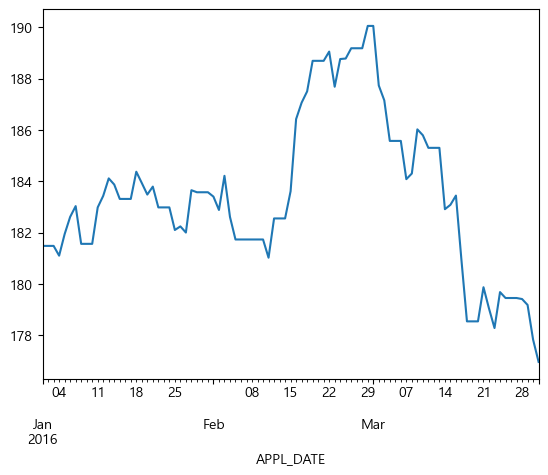

In [24]:
# 중국 위안화 별도 그림(엔화, 달러와 단위 차이)
df_currency_pivot["CNY"].plot()

<AxesSubplot:xlabel='APPL_DATE'>

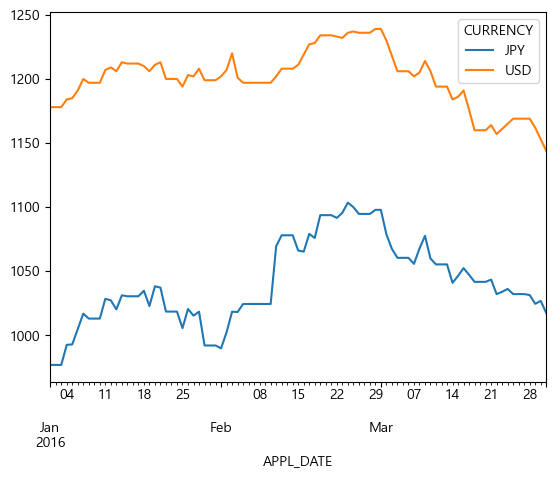

In [25]:
# 일본 엔화, 미국 달러
df_currency_pivot[["JPY", "USD"]].plot()

## Heatmap 그리기

<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

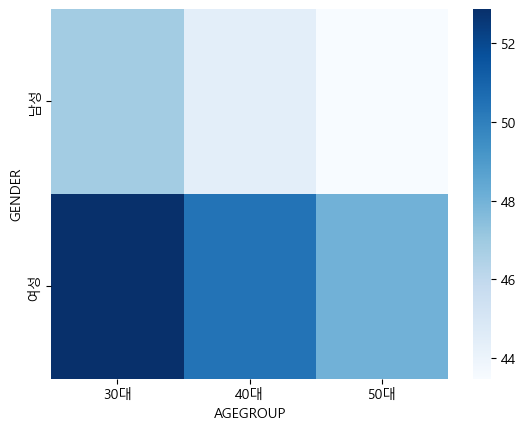

In [26]:
# 성별과 연령대별 혈당 산소 요구량 평균 계산, groupby: (성별, 연령), agg("mean"): 혈당 산소 요구량 평균값
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
# pivot(성별, 연령대, 혈당 산소 요구량): x축(연령대), y축(성별), 값(혈당산소요구량의 평균)으로 pivot
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
# heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot, cmap="Blues")

<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

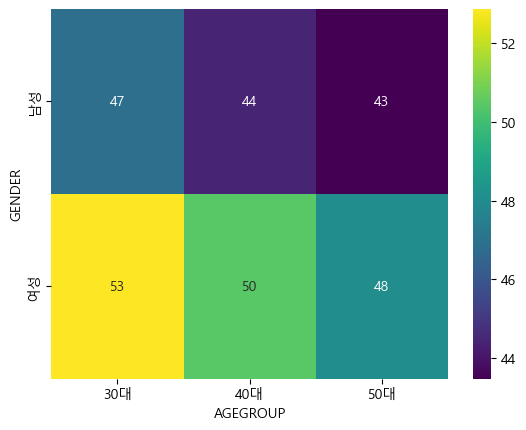

In [27]:
df_pivot = df_agg.pivot_table(index = "GENDER", columns = "AGEGROUP", values = "OXY", aggfunc = 'mean')
# heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot, annot = True, cmap="viridis")

<AxesSubplot:>

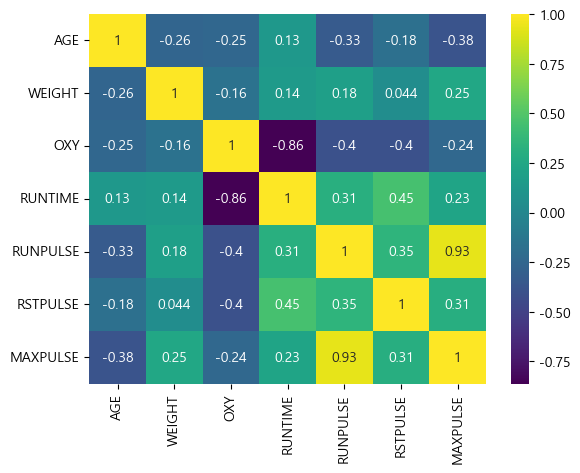

In [28]:
# 상관분석
df_corr = df_fitness.corr()
sns.heatmap(df_corr, annot = True, cmap="viridis")

## Contour Plot 그리기

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

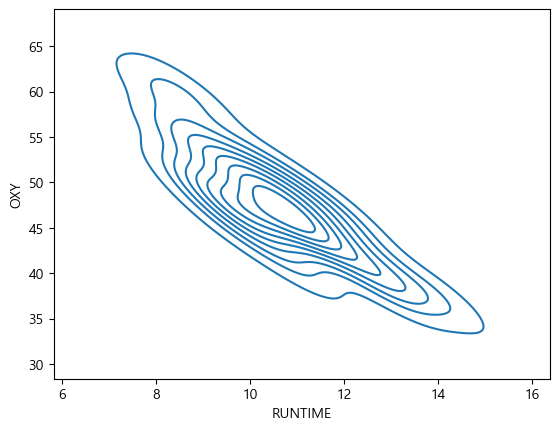

In [29]:
# kdeplot( x축, y축 , shade: 음영 선택 여부) 
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = False)

## Parallel Plot 그리기

<AxesSubplot:>

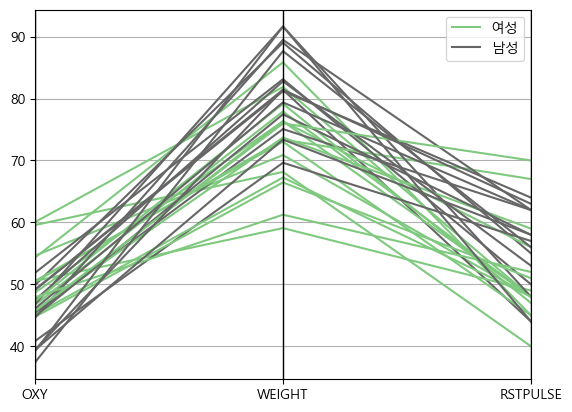

In [31]:
# parallel_coordinates(데이터, 그룹 변수, cols = 변수, colormap= 다양한 colormap지정)
pd.plotting.parallel_coordinates(df_fitness,"GENDER", cols=["OXY", "WEIGHT", "RSTPULSE"],
                                 colormap="Accent")

Text(678.5176767676767, 0.5, '혈당 산소 요구량')

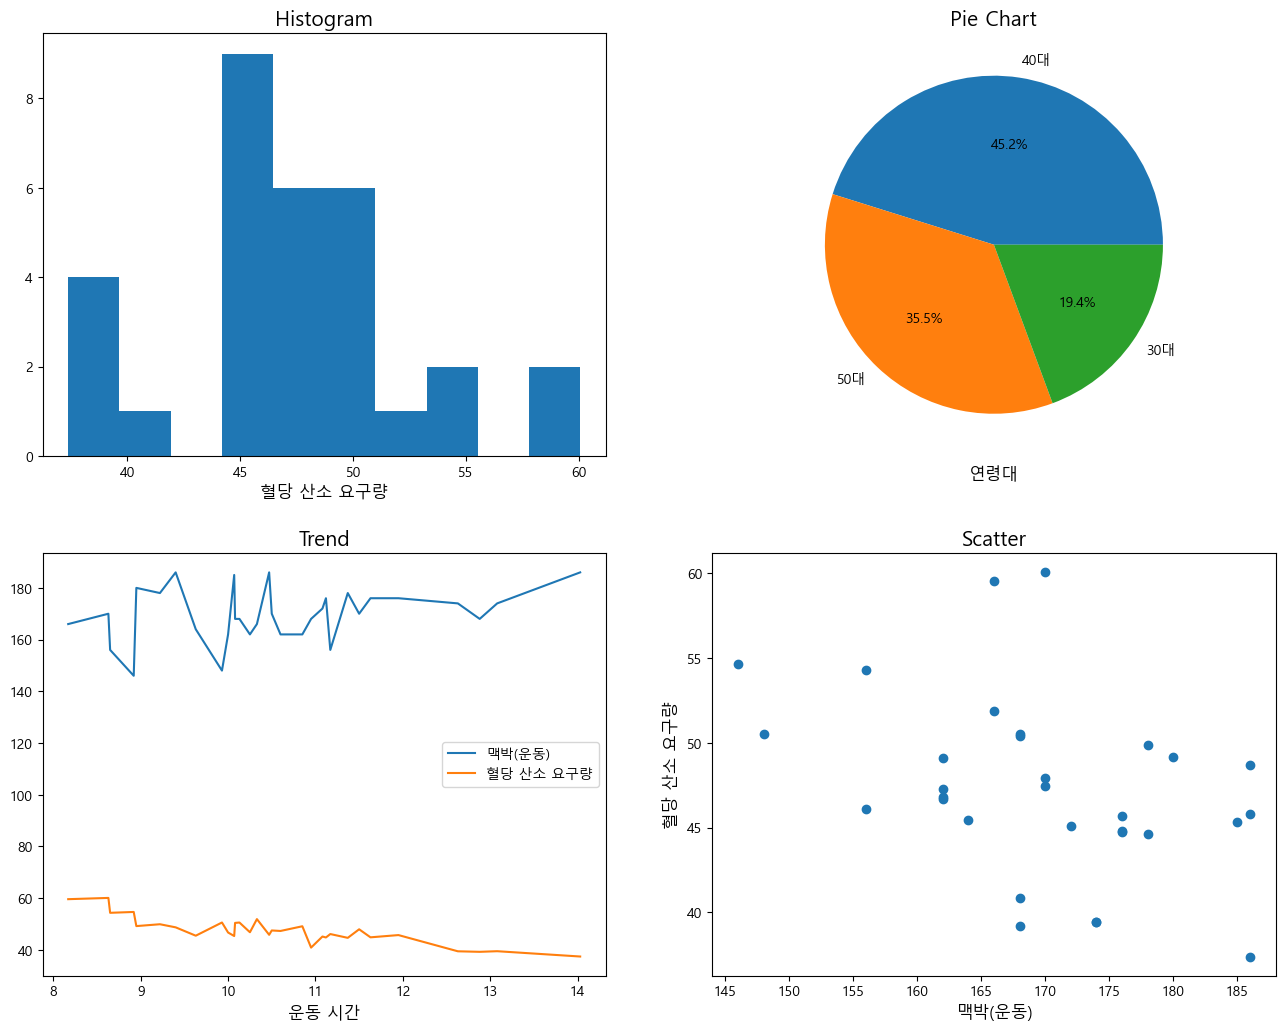

In [32]:
# 192 Page
df_count = df_fitness["AGEGROUP"].value_counts()                  # Pie Chart를 위한 집계 데이터
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (13, 10))    # (2, 2) 4분할, 4개의 그래프 생성
plt.tight_layout(w_pad=5, h_pad=5)                                # w_pad: 열 사이 간격, h_pad: 행 사이 간격
# Histogram
axes[0,0].hist(df_fitness["OXY"])                                 # [0,0] 위치에 Histogram 생성
axes[0,0].set_title("Histogram", fontsize = 15)                   # 제목 설정, 글자 크기 15
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize = 12)           # x축 label 지정
# Pie Chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%") # [0,1] 위치에 Pie Chart 생성
axes[0,1].set_title("Pie Chart", fontsize = 15) 
axes[0,1].set_xlabel("연령대", fontsize = 12)
# Trend
axes[1,0].plot("RUNTIME", "RUNPULSE", data = df_fitness, label = "맥박(운동)") # [1, 0]  x축: 운동 시간, y축: 맥박(운동)
axes[1,0].plot("RUNTIME", "OXY", data = df_fitness, label = "혈당 산소 요구량") # x축: 운동 시간, y축: 산소 요구량
axes[1,0].set_title("Trend", fontsize = 15)
axes[1,0].set_xlabel("운동 시간", fontsize = 12)
axes[1,0].legend()         # 범례 표시
# Scatter
axes[1,1].scatter("RUNPULSE", "OXY", data = df_fitness)   # [1,1] 위치에 산점도 표시, x축: 맥박(운동) , y축: 산소 요구량
axes[1,1].set_title("Scatter", fontsize = 15)
axes[1,1].set_xlabel("맥박(운동)", fontsize = 12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize = 12)